In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
#Load the dataset
df = pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#summarize shape
df.shape

(1372, 5)

In [4]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


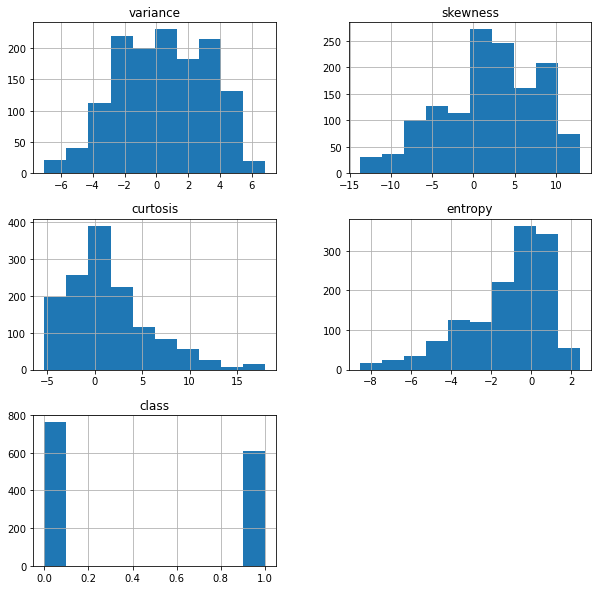

In [6]:
#plot histograms
df.hist(figsize=(10,10))
plt.show()

In [7]:
#split into input and output columns
X = df.drop('class', axis=1)
y = df['class']

In [8]:
#Scaling of input features
std = StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,4.633482e-16,1.000365,-2.630737,-0.776547,0.021974,0.840243,2.249008
skewness,1372.0,-5.385229e-17,1.000365,-2.675252,-0.618819,0.067718,0.833876,1.879908
curtosis,1372.0,-1.456561e-18,1.000365,-1.551303,-0.689946,-0.181271,0.413517,3.836586
entropy,1372.0,-3.236802e-18,1.000365,-3.502703,-0.581738,0.288064,0.755371,1.733680


In [10]:
#split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46)

In [11]:
#number of input features
n_features = X.shape[1]

#define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

#compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#model summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fit the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Train on 960 samples, validate on 412 samples
Epoch 1/50
960/960 [==============================] - 0s 208us/sample - loss: 0.6956 - acc: 0.6844 - val_loss: 0.6025 - val_acc: 0.7354
Epoch 2/50
960/960 [==============================] - 0s 104us/sample - loss: 0.6141 - acc: 0.7146 - val_loss: 0.5446 - val_acc: 0.7694
Epoch 3/50
960/960 [==============================] - 0s 107us/sample - loss: 0.5508 - acc: 0.7500 - val_loss: 0.4978 - val_acc: 0.7718
Epoch 4/50
960/960 [==============================] - 0s 63us/sample - loss: 0.4987 - acc: 0.7542 - val_loss: 0.4616 - val_acc: 0.7864
Epoch 5/50
960/960 [==============================] - ETA: 0s - loss: 0.4649 - acc: 0.764 - 0s 83us/sample - loss: 0.4574 - acc: 0.7719 - val_loss: 0.4318 - val_acc: 0.7888
Epoch 6/50
960/960 [==============================] - 0s 73us/sample - loss: 0.4240 - acc: 0.7979 - val_loss: 0.4059 - val_acc: 0.8058
Epoch 7/50
960/960 [==============================] - 0s 94us/sample - loss: 0.3954 - acc: 0.8313 - val

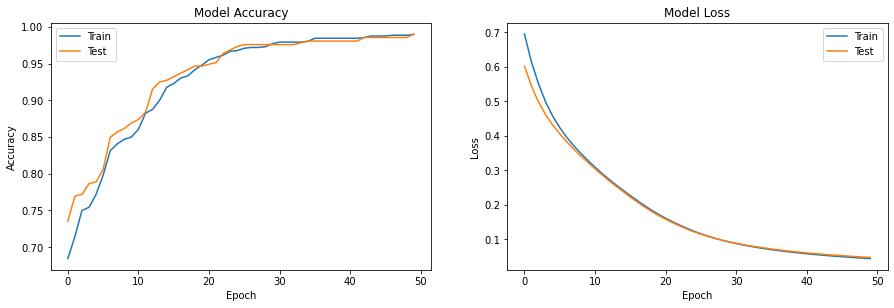

In [13]:
#Plot the accuracy and the loss during the training and testing of NN

plt.figure(figsize=(15,10))

#Model accuracy
plt.subplot(221)
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

#Model loss
plt.subplot(222)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.show()

In [14]:
#predict test set
y_pred = model.predict_classes(X_test)

#evaluate predictions
score = f1_score(y_test, y_pred)
print('F1 score:', score)

F1 score: 0.9895287958115184


In [15]:
from sklearn.metrics import accuracy_score

In [46]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9902912621359223


In [47]:
print('First layer weights:\n', model.layers[0].get_weights()[0])
print('First layer biases:\n', model.layers[0].get_weights()[1])
print('-------------------------------------------------------------------------')
print('Second layer weights:\n', model.layers[1].get_weights()[0])
print('Second layer biases:\n', model.layers[1].get_weights()[1])

First layer weights:
 [[-1.3706262   1.4476063   0.25271323 -1.1387359  -0.7349581   1.5193254
  -1.126378   -1.9485296   1.3475441  -0.06308684]
 [-0.5722223  -0.65950054  0.6096384  -1.048388   -0.73161393  1.1307217
  -1.4979749  -1.1856549  -0.52967536  1.8283366 ]
 [-1.3921794   0.52446866  0.44071794 -1.8586632  -0.80698323  1.2622175
  -0.36691308  0.64747185 -0.26380765  1.2084091 ]
 [-0.88719165 -0.87527806  0.27265665  0.56715673  0.01852613  0.1783846
  -0.4744514  -0.02313008 -1.1457193  -0.67862797]]
First layer biases:
 [ 0.04697642  0.65690607 -0.3040594   0.36812392  0.24776587  0.89643127
  0.3471015  -0.07937246 -0.29635066  0.39331102]
-------------------------------------------------------------------------
Second layer weights:
 [[ 0.13348322]
 [-1.0306451 ]
 [ 0.03711682]
 [ 0.9791785 ]
 [ 0.82784194]
 [-1.3336751 ]
 [ 0.6688549 ]
 [ 0.429432  ]
 [ 0.29093134]
 [-0.44755286]]
Second layer biases:
 [-0.44964656]
